In [1]:
#!pip install gdown
#!pip install tensorflow-gpu

#https://www.curiousily.com/posts/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python/

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

print(tf.__version__)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 15, 5

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED) #for tf version 2.0
#tf.random.set_random_seed(RANDOM_SEED) #for tf version 1.15

2.0.0


In [3]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

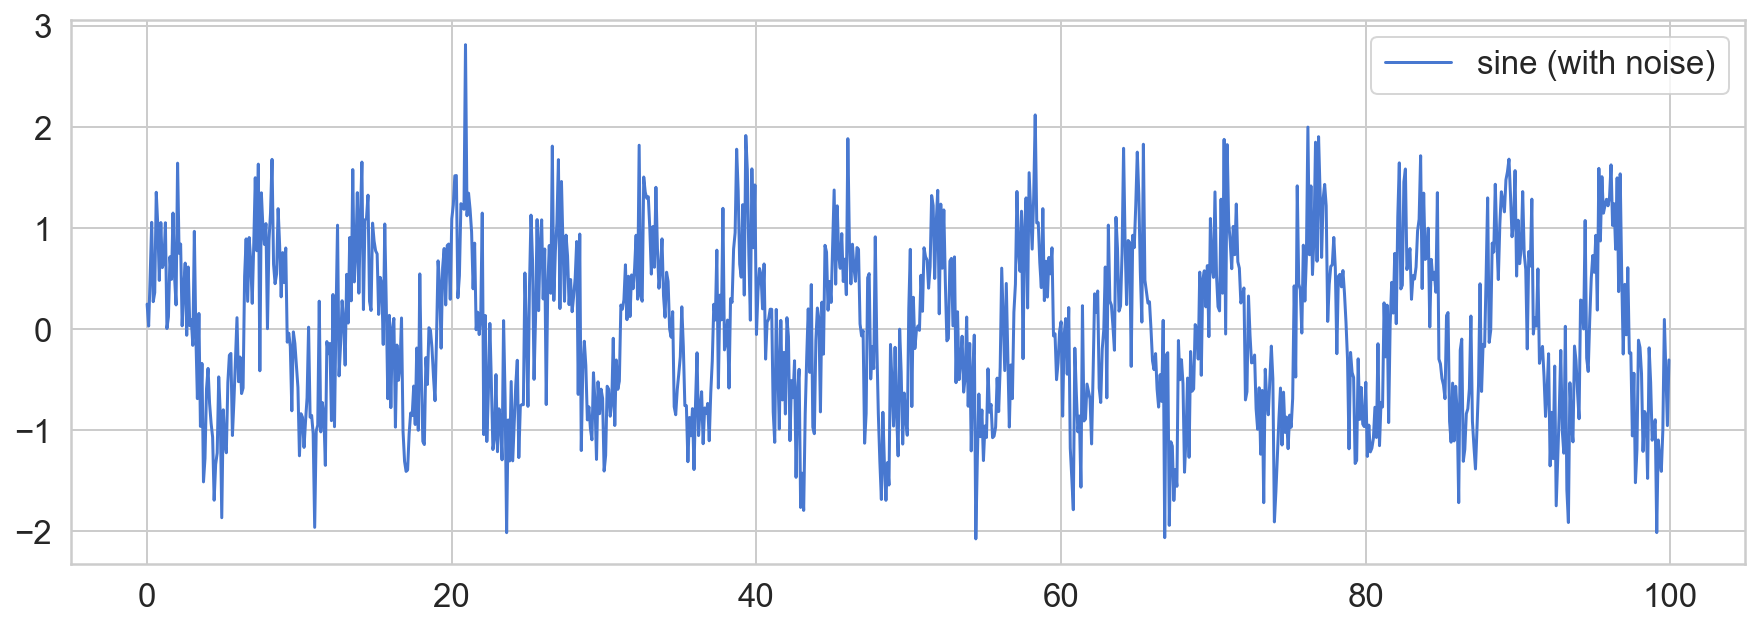

In [4]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

# Data Preprocessing

In [5]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [6]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [7]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)
#print(X_train)

(790, 10, 1) (790,)


# Modeling

In [9]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

## Training

In [10]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=10, 
    validation_split=0.1, 
    verbose=0,
    shuffle=False
) # verbose - log freq

In [11]:
scores = model.evaluate(X_train, y_train, verbose=0)
#print('%s: %.2f%%' % (model.metrics_names, scores * 100))
print('%s: %.2f%%' % ("Error", scores * 100))

Error: 30.41%


## Evaluation

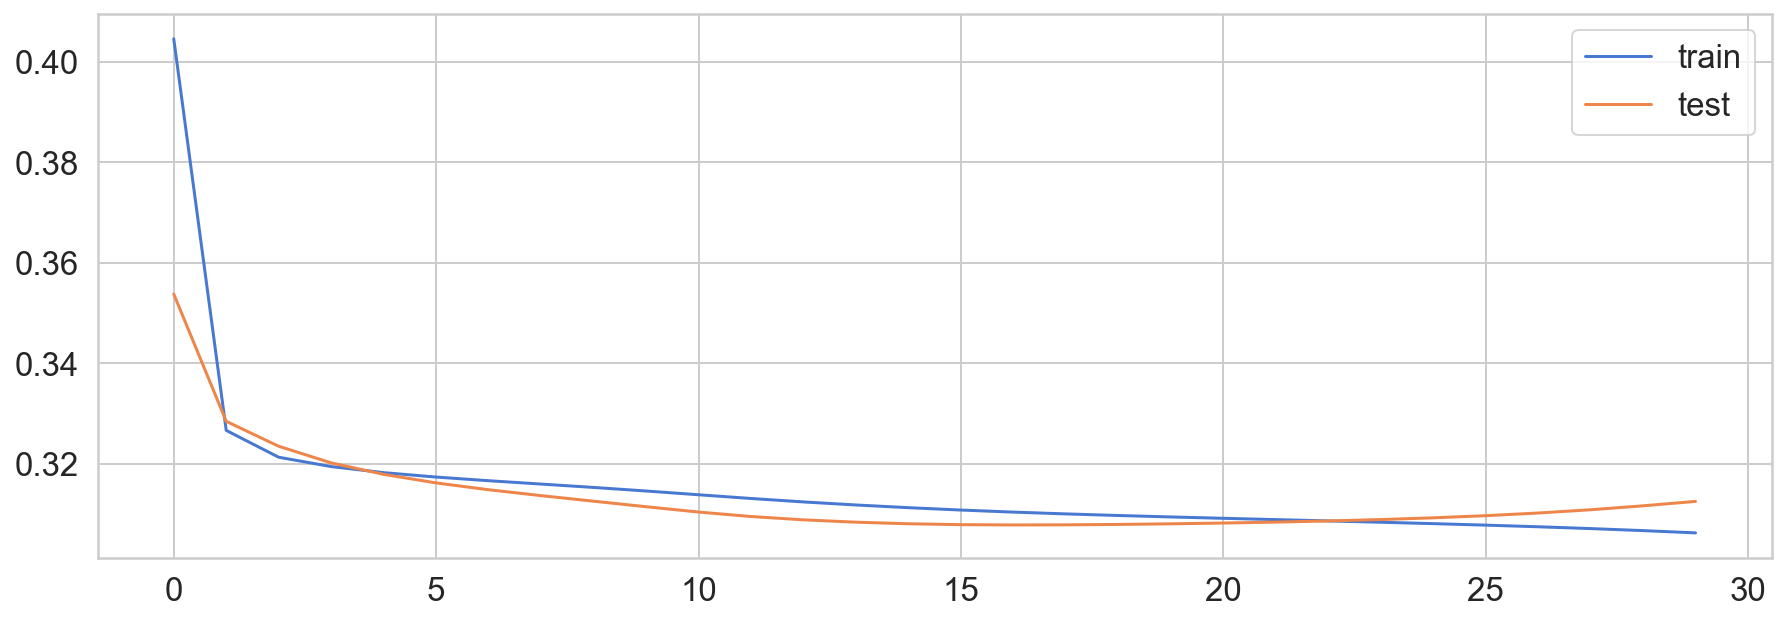

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [13]:
y_pred = model.predict(X_test)

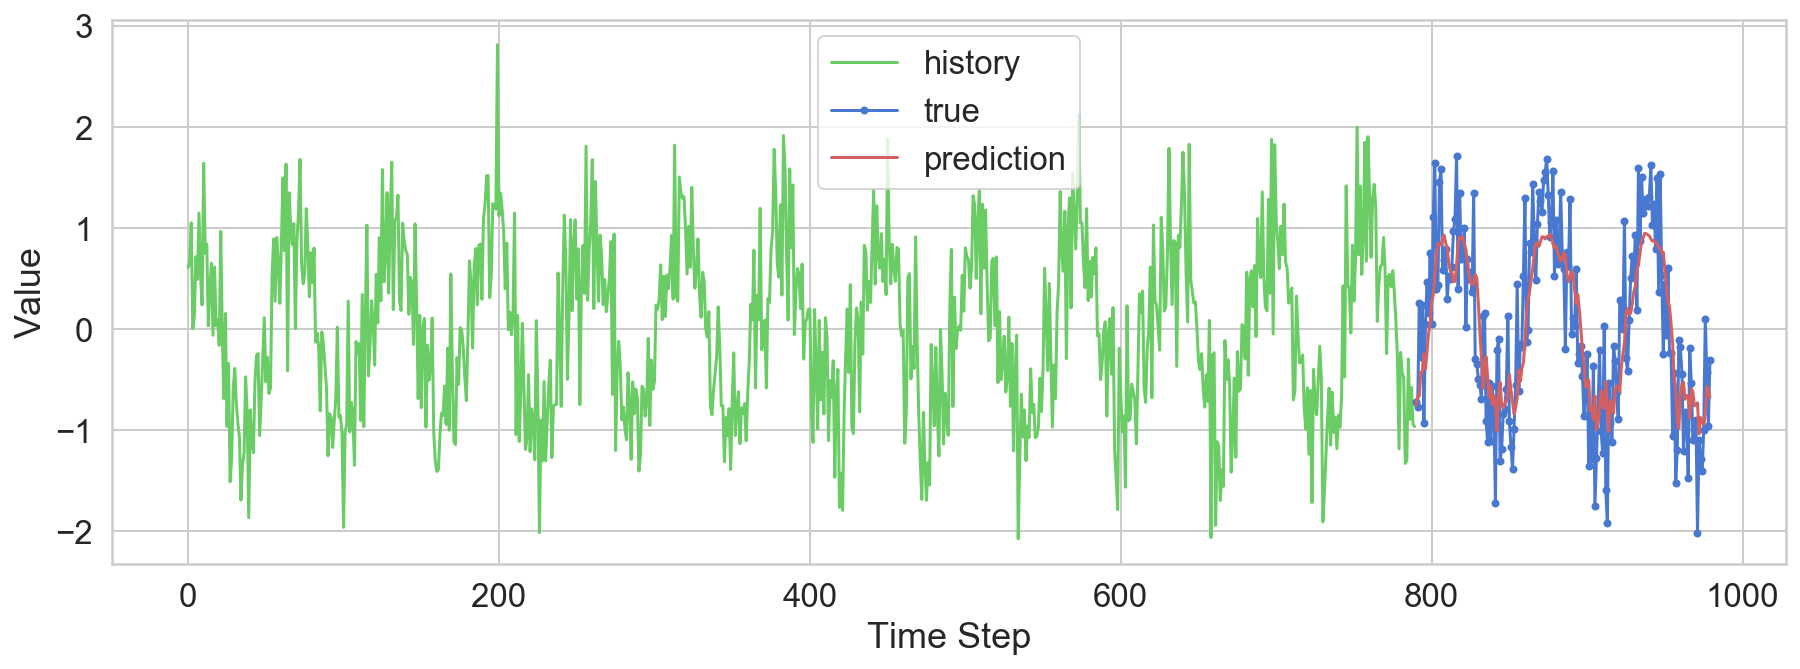

In [14]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

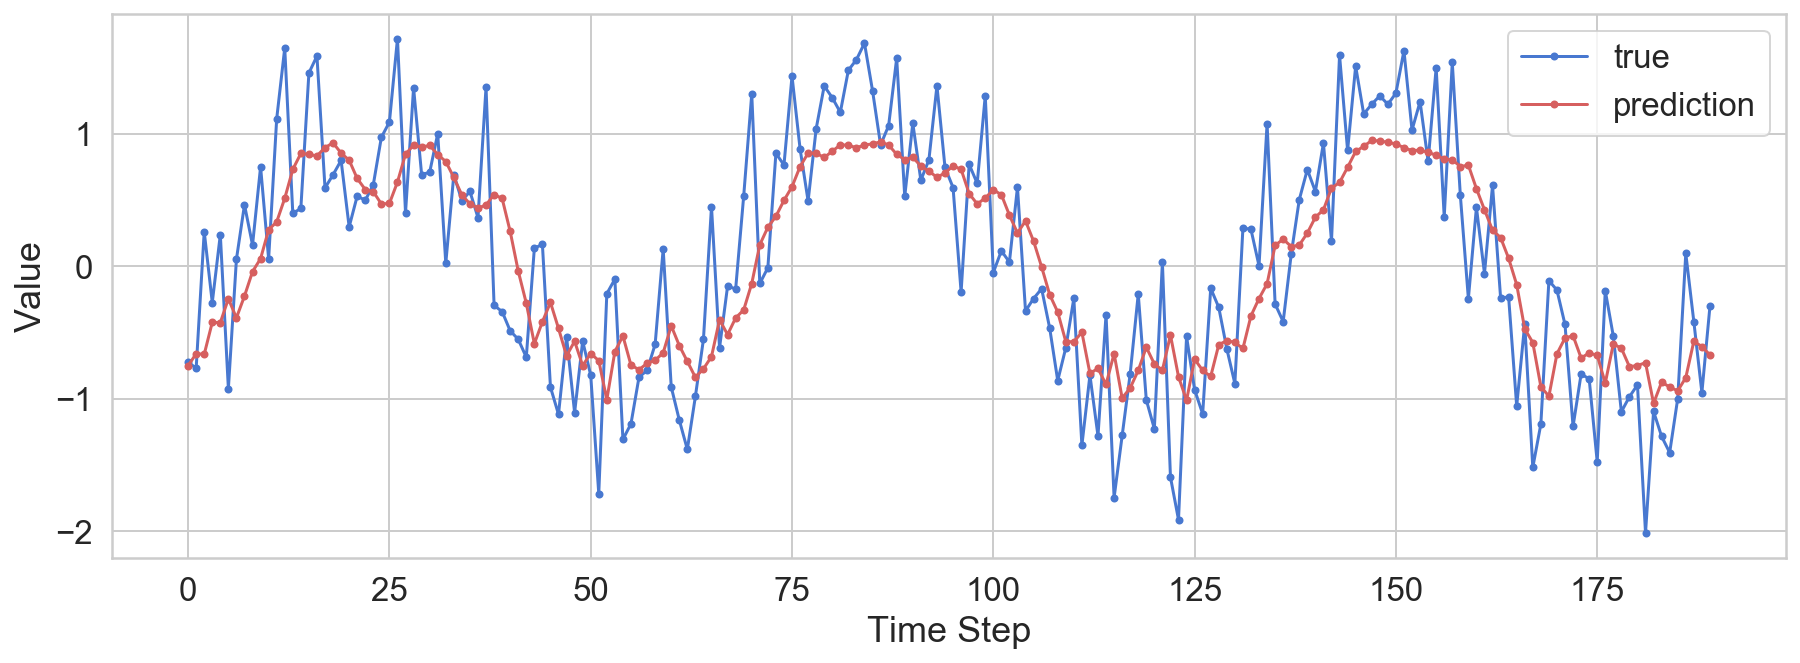

In [15]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction", marker='.')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [16]:

#delta = y_test.reshape(190,1) - y_pred

#print(y_test.tolist())
#print(y_pred.tolist())
#print(delta)


#plt.plot(y_test, marker='.', label="true")
#plt.plot(delta, 'r', label="prediction")
#plt.ylabel('Value')
#plt.xlabel('Time Step')
#plt.legend()
#plt.show();